In [1]:
import numpy as np

In [2]:
np.argmax(np.bincount([0, 0, 1], weights = [0.2, 0.2, 0.6]))

1

In [3]:
ex = np.array([[ 0.9, 0.1], [0.8, 0.2], [0.4, 0.6]])
p=np.average(ex, axis=0, weights=[0.2, 0.2, 0.6])
p

array([0.58, 0.42])

In [4]:
np.argmax(p)

0

In [5]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator

In [6]:
class MajorityVoteClassifier (BaseEstimator, ClassifierMixin): 

    def __init__ (self, classifiers, vote = 'classlabel', weights = None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights
        
    def  fit(self, X, y):
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):

        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:
            predictions = np.asarray([clf.predict(X)
                                    for clf in self.classifiers_ ]).T

            maj_vote = np.apply_along_axis(lambda x: np.argmax 
                                            (np.bincount(x, weights = self.weights)),
                                            axis=1, arr = predictions)
            maj_vote = self.lablenc_.inverse_transform(maj_vote)
            return maj_vote

    def predict_proba(self, X):

        probas = np.asarray([clf.predict_proba(X)
                            for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):

        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)

        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteriterms(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out

In [7]:
import pandas as pd

In [34]:
X = pd.read_csv('C:\\Users\\suleiman\\Documents\\scikit\\csv_files\\X All.csv', header = None )

In [9]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
X, y = X.iloc[:,1:].values, X.iloc[:,0].values

In [36]:
le = LabelEncoder()
y = le.fit_transform(y)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.27,random_state=1)

In [13]:
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [50]:
clf1 = SVC(kernel='rbf', C=10.0, gamma=0.1, probability=True)
clf2 = RandomForestClassifier (n_estimators = 5000, max_depth= 5, n_jobs=1)
clf3 = AdaBoostClassifier(n_estimators=1000, learning_rate=1, random_state= 0)
clf4 = GradientBoostingClassifier(n_estimators = 10000, random_state= 0, learning_rate=1.0, max_depth=2)
clf5 = BaggingClassifier(GaussianNB(), n_estimators=10000, max_samples=1.0, max_features=5, bootstrap = False, bootstrap_features = True, random_state=0, n_jobs = -1)
#clf5 = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=0), 
                         #n_estimators=100, max_samples=1.0, max_features=5, bootstrap = False, bootstrap_features = True, random_state=0)

In [23]:
pipe1 = Pipeline ([['sc', StandardScaler()], ['clf', clf1]])

In [24]:
pipe3 = Pipeline ([['sc', StandardScaler()], ['clf', clf3]])

In [25]:
pipe5 = Pipeline ([['sc', StandardScaler()], ['clf', clf5]])

In [26]:
clf_labels1 = ['SVM', 'Random Forest', 'Ada Boost']

In [27]:
clf_labels2 = ['SVM', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'Bagging GaussianNB']

In [28]:
print('10-fold cross validation: \n')

10-fold cross validation: 



In [51]:
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3])
clf_labels1 += ['Majority Voting']
all_clf = [pipe1, clf2, pipe3, mv_clf]
for clf, label in zip(all_clf, clf_labels1):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring = 'accuracy')
    print("SCORE: %0.5f(+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

SCORE: 0.87661(+/- 0.066) [SVM]
SCORE: 0.83560(+/- 0.087) [Random Forest]
SCORE: 0.82851(+/- 0.086) [Ada Boost]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Stu

SCORE: 0.84940(+/- 0.059) [Majority Voting]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [32]:
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3])
clf_labels1 += ['Majority Voting']
all_clf = [pipe1, clf2, pipe3, mv_clf]
for clf, label in zip(all_clf, clf_labels1):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring = 'precision')
    print("SCORE: %0.5f(+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

SCORE: 0.81520(+/- 0.088) [SVM]
SCORE: 0.82849(+/- 0.106) [Random Forest]
SCORE: 0.83909(+/- 0.120) [Ada Boost]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Stu

SCORE: 0.83448(+/- 0.098) [Majority Voting]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [33]:
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3])
clf_labels1 += ['Majority Voting']
all_clf = [pipe1, clf2, pipe3, mv_clf]
for clf, label in zip(all_clf, clf_labels1):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring = 'recall')
    print("SCORE: %0.5f(+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

SCORE: 0.91429(+/- 0.095) [SVM]
SCORE: 0.91429(+/- 0.095) [Random Forest]
SCORE: 0.85714(+/- 0.128) [Ada Boost]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Stu

SCORE: 0.91429(+/- 0.095) [Majority Voting]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [102]:
mv_clf = MajorityVoteClassifier(classifiers=[pipe1])
clf_labels1 += ['Majority Voting']
all_clf = [pipe1, mv_clf]
for clf, label in zip(all_clf, clf_labels1):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring = 'f1')
    print("SCORE: %0.2f(+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

SCORE: 0.87(+/- 0.091) [SVM]
SCORE: 0.87(+/- 0.091) [Random Forest]


In [54]:
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3])
clf_labels1 += ['Majority Voting']
all_clf = [pipe1, clf2, pipe3, mv_clf]
for clf, label in zip(all_clf, clf_labels1):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring = 'accuracy')
    print("SCORE: %0.5f(+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

SCORE: 0.84286(+/- 0.083) [SVM]
SCORE: 0.85714(+/- 0.096) [Random Forest]
SCORE: 0.85714(+/- 0.078) [Ada Boost]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Stu

SCORE: 0.86429(+/- 0.081) [Majority Voting]


C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [23]:
colors = ['red', 'blue', 'purple', 'green']
linestyles = [':', '--', '-.', '-']

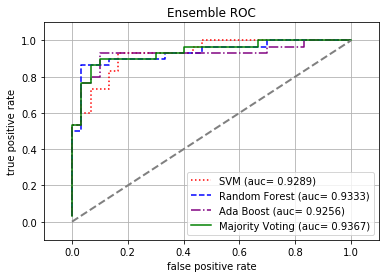

In [27]:
for clf, label, clr, ls in zip(all_clf, clf_labels1, colors, linestyles):
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, treshholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc= %0.4f)' % (label, roc_auc))
plt.title('Ensemble ROC')
plt.legend(loc="lower right")
plt.plot ([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

No handles with labels found to put in legend.


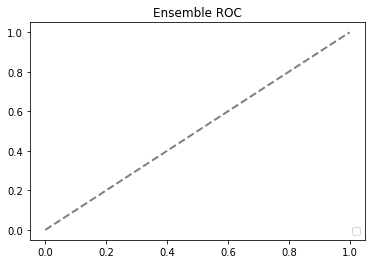

In [25]:
plt.title('Ensemble ROC')
plt.legend(loc="lower right")
plt.plot ([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)

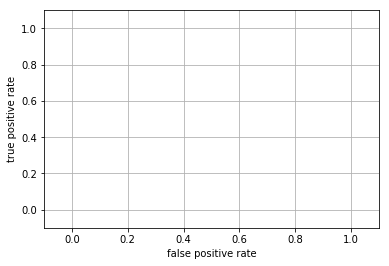

In [26]:
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [27]:
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3, clf4, pipe5])
clf_labels2 += ['Majority Voting']
all_clf = [pipe1, clf2, pipe3, clf4, pipe5, mv_clf]
for clf, label in zip(all_clf, clf_labels2):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring = 'roc_auc')
    print("SCORE: %0.5f(+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

SCORE: 0.93673(+/- 0.065) [SVM]
SCORE: 0.93878(+/- 0.061) [Random Forest]
SCORE: 0.89796(+/- 0.086) [Ada Boost]
SCORE: 0.92653(+/- 0.058) [Gradient Boost]
SCORE: 0.91429(+/- 0.084) [Bagging GaussianNB]
SCORE: 0.94082(+/- 0.057) [Majority Voting]


In [28]:
colors = ['black', 'orange', 'blue', 'green', 'purple', 'red']
linestyles = [':', '--', '-.', '-', ':', '--']

In [29]:
for clf, label, clr, ls in zip(all_clf, clf_labels2, colors, linestyles):
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    fpr, tpr, treshholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc= %0.4f)' % (label, roc_auc))

In [30]:
plt.title('Ensemble ROC')
plt.legend(loc="lower right")
plt.plot ([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)

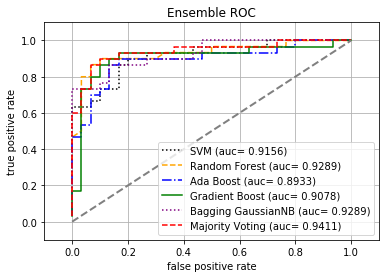

In [31]:
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [46]:
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3])
clf_labels1 += ['Majority Voting']
all_clf = [pipe1, clf2, pipe3, mv_clf]
for clf, label in zip(all_clf, clf_labels1):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring = 'accuracy')
    print("Accuracy: %0.5f(+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.84286(+/- 0.083) [SVM]
Accuracy: 0.85714(+/- 0.096) [Random Forest]
Accuracy: 0.85714(+/- 0.078) [Ada Boost]
Accuracy: 0.86429(+/- 0.081) [Majority Voting]


In [47]:
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3, clf4, pipe5])
clf_labels2 += ['Majority Voting']
all_clf = [pipe1, clf2, pipe3, clf4, pipe5, mv_clf]
for clf, label in zip(all_clf, clf_labels2):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring = 'accuracy')
    print("Accuracy: %0.5f(+/- %0.3f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.84286(+/- 0.083) [SVM]
Accuracy: 0.85714(+/- 0.096) [Random Forest]
Accuracy: 0.85714(+/- 0.078) [Ada Boost]
Accuracy: 0.84286(+/- 0.083) [Gradient Boost]
Accuracy: 0.82143(+/- 0.112) [Bagging GaussianNB]
Accuracy: 0.85714(+/- 0.085) [Majority Voting]
